# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

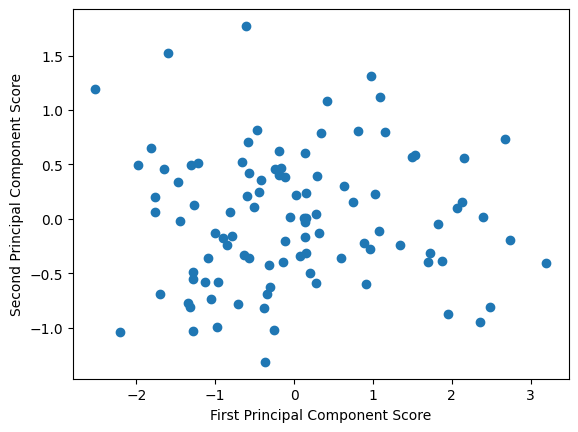

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The three outliers in the upper left have low first and high second principal component scores, meaning they differ from the main trend. This suggests unusual values in `series_3`, which introduces variance orthogonal to `series_1` and `series_2`. The PCA effectively separates this structure, even though `series_1` and `series_2` are almost indistinguishable.


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

**Info**

I'll be using the Housing Dataset. It's saved as "df_housing_cleaned.csv".

**Step 1: Drawing a heat map**

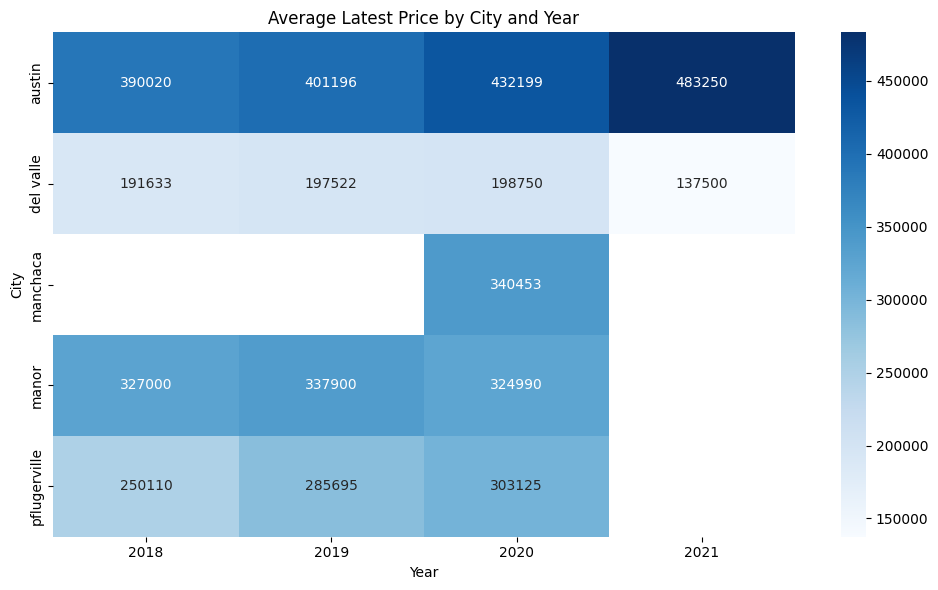

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("df_housing_cleaned.csv")

# Create a pivot table: rows = cities, columns = years, values = avg latestPrice
pivot_table = df.pivot_table(
    values='latestPrice',
    index='city',
    columns='latest_saleyear',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Blues')
plt.title("Average Latest Price by City and Year")
plt.xlabel("Year")
plt.ylabel("City")
plt.tight_layout()
plt.show()




**Step 2: Drawing a bubble plot**

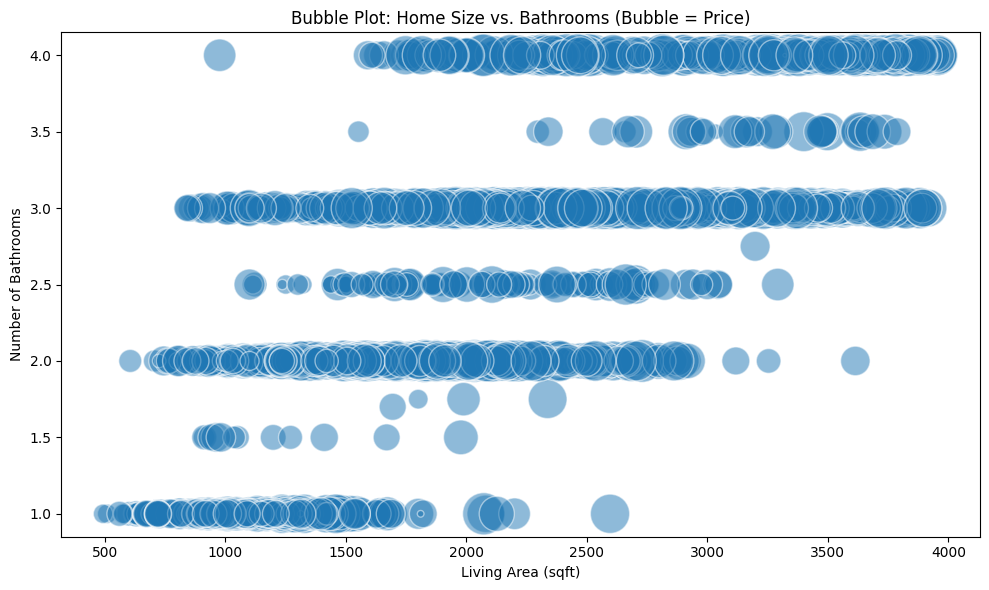

In [6]:
df = pd.read_csv("df_housing_cleaned.csv")

# Drop rows with missing values in the relevant columns
bubble_data = df[['livingAreaSqFt', 'numOfBathrooms', 'latestPrice']].dropna()

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_data['livingAreaSqFt'],
    bubble_data['numOfBathrooms'],
    s=bubble_data['latestPrice'] / 1000,  # scale the bubble size
    alpha=0.5,
    edgecolors='w'
)

plt.xlabel('Living Area (sqft)')
plt.ylabel('Number of Bathrooms')
plt.title('Bubble Plot: Home Size vs. Bathrooms (Bubble = Price)')
plt.tight_layout()
plt.show()


**Step 3: PCA Analysis**

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("df_housing_cleaned.csv")

# Select relevant numeric features for PCA
features = [
    'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms',
    'lotSizeSqFt', 'garageSpaces', 'houseAge', 'pricePerSqFt'
]
pca_data = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Run PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# First principal component (1D projection)
first_pc = pca_components[:, 0]

# Optional: First PC back to the original data
pca_data['PC1'] = first_pc


Explained variance by each component: [0.43418397 0.1836134  0.14056021 0.09432366 0.07240306 0.04790451
 0.0270112 ]


### PCA Summary

I performed PCA using the following standardized features: `livingAreaSqFt`, `numOfBathrooms`, `numOfBedrooms`, `lotSizeSqFt`, `garageSpaces`, `houseAge`, and `pricePerSqFt`.

The **first principal component** captures approximately **43.4%** of the total variance. This suggests that much of the variability in the dataset can be represented along a single axis.

➡️ PCA is useful here for reducing dimensionality and simplifying


**Step 4: Linear Regression**

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("df_housing_cleaned.csv")

# Drop missing values from all relevant columns
df_clean = df[[
    'latestPrice', 'livingAreaSqFt', 'numOfBathrooms',
    'lotSizeSqFt', 'garageSpaces', 'numOfBedrooms', 'houseAge'
]].dropna()

# Target variable
y = df_clean['latestPrice']

# Model 1: Single feature
X1 = df_clean[['livingAreaSqFt']]
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model1 = LinearRegression().fit(X1_train, y_train)
r2_1 = r2_score(y_test, model1.predict(X1_test))

# Model 2: 3 features
X2 = df_clean[['livingAreaSqFt', 'numOfBathrooms', 'lotSizeSqFt']]
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)
model2 = LinearRegression().fit(X2_train, y_train)
r2_2 = r2_score(y_test, model2.predict(X2_test))

# Model 3: 4 features
X3 = df_clean[['livingAreaSqFt', 'numOfBedrooms', 'garageSpaces', 'houseAge']]
X3_train, X3_test, _, _ = train_test_split(X3, y, test_size=0.2, random_state=42)
model3 = LinearRegression().fit(X3_train, y_train)
r2_3 = r2_score(y_test, model3.predict(X3_test))

# Model 4: All 6 features
X4 = df_clean[['livingAreaSqFt', 'numOfBathrooms', 'lotSizeSqFt', 'garageSpaces', 'numOfBedrooms', 'houseAge']]
X4_train, X4_test, _, _ = train_test_split(X4, y, test_size=0.2, random_state=42)
model4 = LinearRegression().fit(X4_train, y_train)
r2_4 = r2_score(y_test, model4.predict(X4_test))

# Print results
print(f"R² - Model 1 (1 feature):               {r2_1:.3f}")
print(f"R² - Model 2 (3 features):              {r2_2:.3f}")
print(f"R² - Model 3 (4 features, different):   {r2_3:.3f}")
print(f"R² - Model 4 (6 features):              {r2_4:.3f}")


R² - Model 1 (1 feature):               0.240
R² - Model 2 (3 features):              0.258
R² - Model 3 (4 features, different):   0.357
R² - Model 4 (6 features):              0.364


### Linear Regression Summary

I tested four linear regression models to predict `latestPrice` using different feature sets. Below are the results:

- **Model 1** (1 feature: `livingAreaSqFt`): R² = **0.240**
- **Model 2** (3 features: `livingAreaSqFt`, `numOfBathrooms`, `lotSizeSqFt`): R² = **0.258**
- **Model 3** (4 features: `livingAreaSqFt`, `numOfBedrooms`, `garageSpaces`, `houseAge`): R² = **0.357**
- **Model 4** (6 features: combines all of the above): R² = **0.364**

**Conclusion**: 
Adding more relevant features improves model performance. `garageSpaces`, `numOfBedrooms`, and `houseAge` added the most predictive power. However, even the best model only explains ~36% of the variance, so other factors likely influence price as well.


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

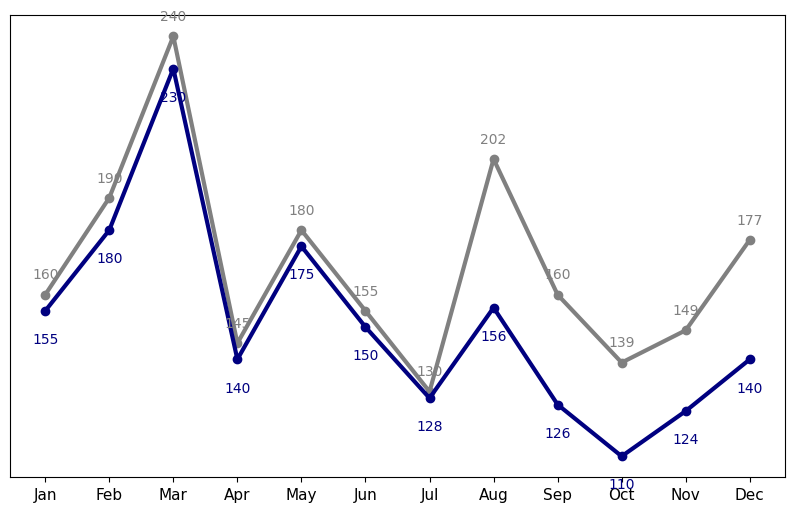

In [17]:
# Sample data, roughly matching what's in the book
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [160, 190, 240, 145, 180, 155, 130, 202, 160, 139, 149, 177]
processed = [155, 180, 230, 140, 175, 150, 128, 156, 126, 110, 124, 140]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(months, received, color='gray', linewidth=3, marker='o', label='Received')
plt.plot(months, processed, color='navy', linewidth=3, marker='o', label='Processed')

# Add point labels
for i in range(len(months)):
    plt.text(months[i], received[i] + 5, str(received[i]), color='gray', ha='center', fontsize=10)
    plt.text(months[i], processed[i] - 10, str(processed[i]), color='navy', ha='center', fontsize=10)

# Styling
plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=11)
plt.yticks([])
plt.grid
